In [1]:
import pandas as pd
import importlib
import pytae
importlib.reload(pytae)
pt = pytae.Plotter()
# Example usage (prototype phase):
df = pd.DataFrame({
    'x1': ['A', 'B', 'C', 'D', 'E'],
    'x2': ['F', 'G', 'H', 'I', 'J'],
    'y1': [1, 2, 3, 2, 3],
    'y2': [5, 4, 6, 5, 7],
    'z': ['Type1', 'Type1', 'Type1', 'Type1', 'Type1']
})


df2 = pd.DataFrame([[5.1, 3.5, 'a'], [4.9, 3.0, 'a'], [7.0, 3.2, 'c'],
                   [6.4, 3.2, 'd'], [5.9, 3.0,'e']],
                  columns=['length', 'width', 'species'])


df2

,length,width,species
0,5.1,3.5,a
1,4.9,3.0,a
2,7.0,3.2,c
3,6.4,3.2,d
4,5.9,3.0,e


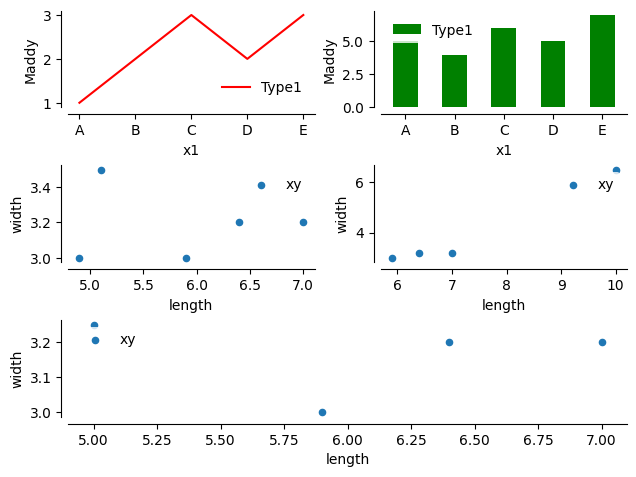

In [2]:
mosaic = """
AB
CD
EE
"""
k = pytae.Plotter(mosaic)

(k
.data(df)
.plot(x='x1', 
       y='y1',
       by='z',
       dropna=False,
       color='red',
       on='A',ylabel='Maddy')
.plot(y='y2',
       by='z',
       dropna=False,
       kind='bar',
       color='green',
       on='B')
.data(df)
# .plot(x='x1', 
#        y='y1',
#        by='z',
#        dropna=False,
#        color='red',
#        on='D')
# .plot(x='x2',
#     y='y2',
#        by='z',
#        dropna=False,
#        kind='bar',
#        color='green',
#        on='C')

.data(df2)
.plot(x='length',y='width',kind='scatter',on='C',by='species',label='xy')
.plot(on='D',aggfunc='sum')
.plot(on='E',aggfunc='mean')
.finalize()
)

k.fig
